In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mpl
import numpy as np


In [229]:
credit = pd.read_csv('C:/Users/heath/Documents/Data Class/Data Science with Python/Task 1 Get Started with Data Science and Python/default_of_credit_card_clients.csv', header =1)

In [122]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [93]:
des = credit.describe()
print(des)
#des.to_csv('describe_credit.csv')

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [143]:
#turn default attribute into boolean for classification model
credit['default payment next month'] = credit['default payment next month'].astype(bool)

In [140]:
#Create an "Activity Indicator" column 
## To be used to delete records that have no pay or bill amounts 
credit['ACTIVE_IND'] = credit['BILL_AMT1'] + credit['BILL_AMT2']+ credit['BILL_AMT3'] + credit['BILL_AMT4'] + credit['PAY_AMT1']+ credit['PAY_AMT2']+ credit['PAY_AMT3']+ credit['PAY_AMT4']
##credit = credit[credit.ACTIVE_IND != 0]

In [146]:
##Number of records that haved had no bill or payment balances in 6 months recorded 
##Will most likely delete records before modelling will keep in for EDA
zero_history = credit[credit.ACTIVE_IND == 0]
print(zero_history['ACTIVE_IND'].count())

961


In [53]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'ACTIVE_IND'],
      dtype='object')


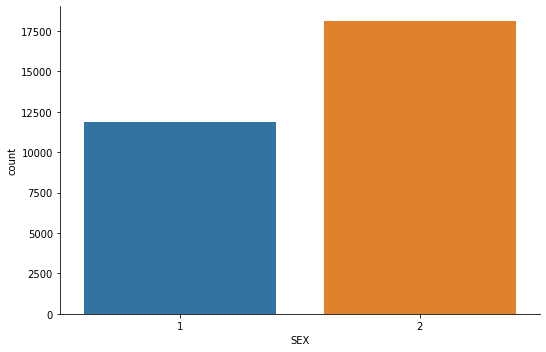

In [132]:
# Group by sex to see portions of men and women 
# 1 = male; 2 = female
sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

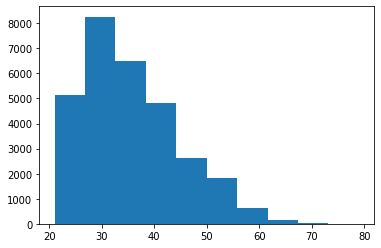

In [253]:
#histogram of age
plt.hist(credit['AGE'])
plt.show()

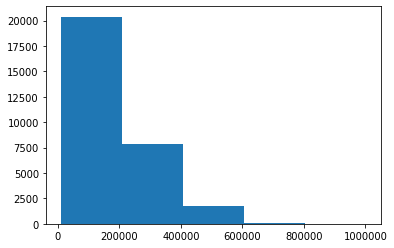

In [96]:
#histogram of limit balance
#Last two bins have almost no record counts
plt.hist(credit['LIMIT_BAL'], bins=5)
plt.show()

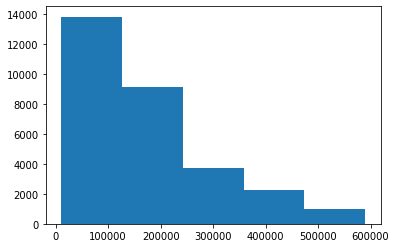

In [168]:
#elimination of records with balances over 600000 
LIMIT_BAL_TEST = credit[credit.LIMIT_BAL < 600000]
plt.hist(LIMIT_BAL_TEST['LIMIT_BAL'], bins=5)
plt.show()

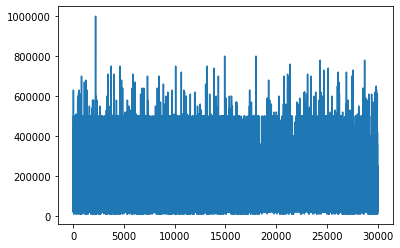

In [67]:
#line plot of limit balance
#plt.plot(credit['LIMIT_BAL'])
plt.show()

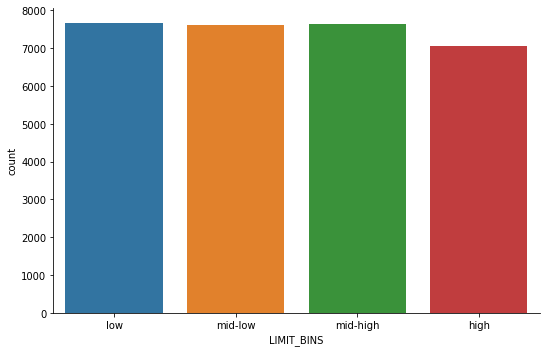

In [250]:
#testing LIMIT_BAL binning
LIMIT_BAL_TEST = credit[credit.LIMIT_BAL > 0]
bins = [0, 50000, 140000,  240000, 1000000] #divided by quartiles
group_names = ['low', 'mid-low', 'mid-high', 'high' ]
LIMIT_BAL_TEST['LIMIT_BINS'] = pd.cut(LIMIT_BAL_TEST['LIMIT_BAL'], bins, labels=group_names)
sns.catplot('LIMIT_BINS', data=LIMIT_BAL_TEST, kind='count', aspect=1.5)

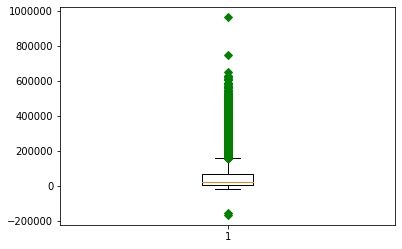

In [129]:
#box plot for BILL_AMT1
#outliers on both the high and low ends that will need to be addressed in preprocessing
#can binned or deleted
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

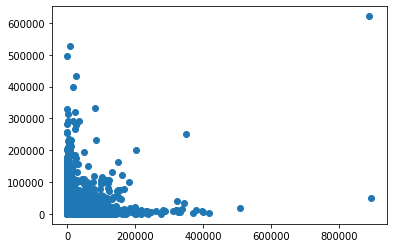

In [155]:
#scatter plot between consecutive payment amounts
#too many outliers to get meanful analysis
x = credit['PAY_AMT3']
y = credit['PAY_AMT4']
plt.scatter(x,y)
plt.show()

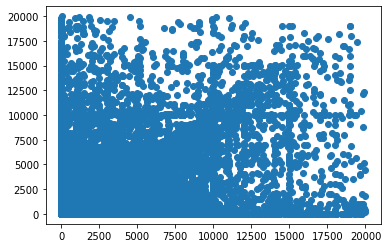

In [173]:
#scatter plot between consecutive payment amounts. Looking only at high frequency payment amounts
#variance between payments seems fairly random. Might largely depend on varying bill amounts instead?
pay_amt_test = credit[credit.PAY_AMT3 < 20000]
pay_amt_test = pay_amt_test[pay_amt_test.PAY_AMT4 < 20000]
x = pay_amt_test['PAY_AMT3']
y = pay_amt_test['PAY_AMT4']
plt.scatter(x,y)
plt.show()

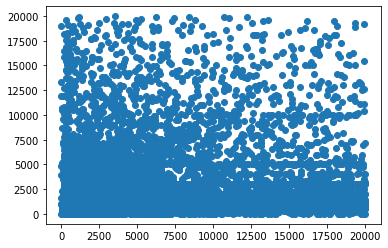

In [238]:
#scatter plot between pay and bill amount for a single month. 
#Looking only at high frequency payment amounts
#Original thought around high correlation not seen as clearly in the data
bill_pay_test = credit[credit.BILL_AMT3 < 20000]
bill_pay_test = bill_pay_test[bill_pay_test.BILL_AMT3 > 0]
bill_pay_test = bill_pay_test[bill_pay_test.PAY_AMT3 < 20000]
bill_pay_test = bill_pay_test[bill_pay_test.PAY_AMT3 > 0]
x = bill_pay_test['BILL_AMT3']
y = bill_pay_test['PAY_AMT3']
plt.scatter(x,y)
plt.show()

In [126]:
#correlation of all variables
#PAY_# variables have highest positive correlation with predictive default variable
#LIMIT_BAL has highest negative correlation
corrMat = credit.corr()
print(corrMat)
#corrMat.to_csv('correlation.csv')

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

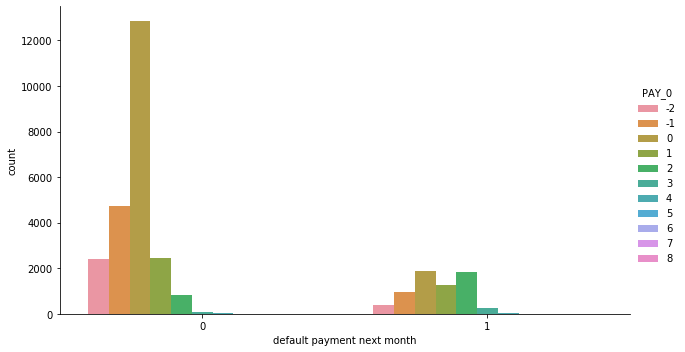

In [244]:
#Exploring highest positive correlation variable "PAY_0". Organized by color
#explaination of color groups: -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 
#all positive numbers represent the number of delayed months
#x-axis: 0 = no default; 1 = default
g = sns.factorplot('default payment next month', data=LIMIT_BAL_TEST, hue='PAY_0', kind='count', aspect=1.75)

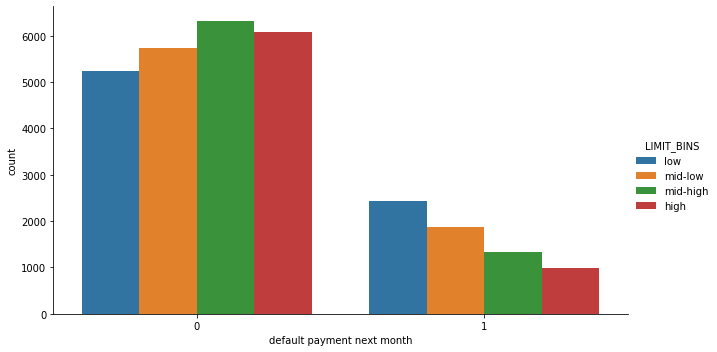

In [251]:
#Exploring largest negative correlation variable "LIMIT_BAL". Organized by color
#colors are from binning done in previous steps. bins are fairly evenly split
g = sns.factorplot('default payment next month', data=LIMIT_BAL_TEST, hue='LIMIT_BINS', kind='count', aspect=1.75)

In [125]:
#covariance of all variables
covMat = credit.cov()
print(covMat)
#covMat.to_csv('Covariance.csv')

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

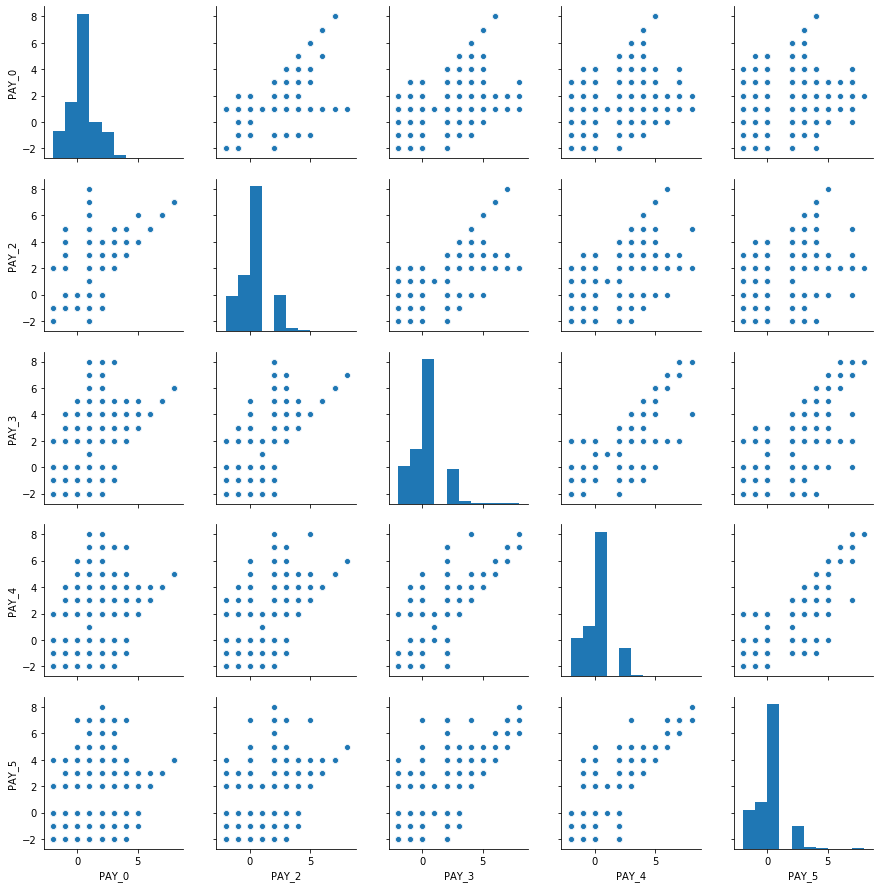

In [175]:
#PAY_# variables had high covariances 
#scatter plot to visualize relationship of PAY_# variables
#All PAY_# variables might not be needed for modelling 
PAY_ONLY = credit[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5']]
sns.pairplot(PAY_ONLY)